# Importação das bibliotecas

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import linear_model, datasets, metrics
from sklearn import svm
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Funções úteis

In [107]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

# Carrega o Dataset

In [57]:
mnist = fetch_mldata("MNIST original")

# Pré-processamento

In [58]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data / 255., mnist.target, test_size=0.20)
print('Utilizamos %d amostras para treinamento e %d amostras para teste' % (len(X_train), len(X_test)))

n_samples = mnist.data.shape[0]
n_features = mnist.data.shape[1]

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('numero de amostras total do dataset:', n_samples)
print('numero de features:', n_features)

n_components = 16

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

pca_numbers = pca.components_.reshape((n_components, 28, 28))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Utilizamos 56000 amostras para treinamento e 14000 amostras para teste
numero de amostras total do dataset: 70000
numero de features: 784


# Plot de algumas imagens do Dataset

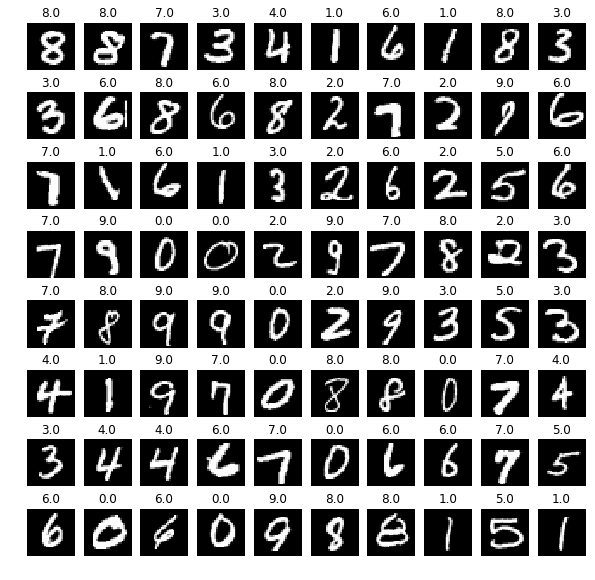

In [144]:
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_train[i],(28,28), y_train[i], cmp="gray")
plt.show()

# Plot das imagens após o redimensionamento

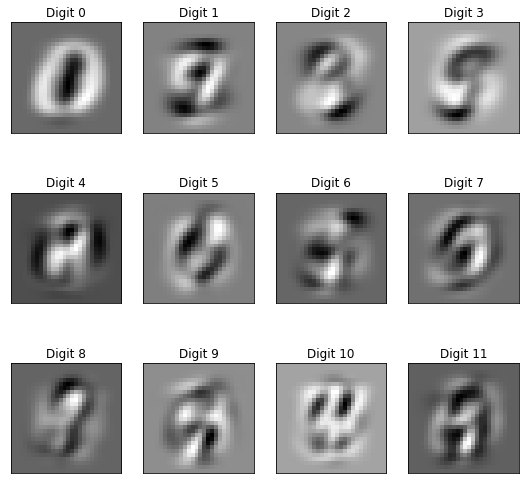

In [73]:
pcanumber_titles= []
for i in range(mnist.data.shape[0]):
    pcanumber_titles.append("Digit "+str(i))
 
plot_gallery(pca_numbers, pcanumber_titles, 28, 28)
 
plt.show()

# Treinamento utilizando o MLPClassifier

In [78]:
mlp = MLPClassifier(hidden_layer_sizes=(89,), activation='tanh', max_iter=1000, alpha=1e-5,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

In [79]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Training set score WITHOUT pca: %f" % mlp.score(X_train, y_train))
print("Test set score WITHOUT pca: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.30799556
Iteration 2, loss = 0.15174461
Iteration 3, loss = 0.10894355
Iteration 4, loss = 0.08618340
Iteration 5, loss = 0.07061770
Iteration 6, loss = 0.05878632
Iteration 7, loss = 0.04918415
Iteration 8, loss = 0.04224581
Iteration 9, loss = 0.03640958
Iteration 10, loss = 0.03124055
Iteration 11, loss = 0.02721926
Iteration 12, loss = 0.02371437
Iteration 13, loss = 0.02024728
Iteration 14, loss = 0.01745119
Iteration 15, loss = 0.01516371
Iteration 16, loss = 0.01332521
Iteration 17, loss = 0.01159978
Iteration 18, loss = 0.01051673
Iteration 19, loss = 0.00934392
Iteration 20, loss = 0.00832776
Iteration 21, loss = 0.00760947
Iteration 22, loss = 0.00680568
Iteration 23, loss = 0.00622324
Iteration 24, loss = 0.00571247
Iteration 25, loss = 0.00519346
Iteration 26, loss = 0.00481790
Iteration 27, loss = 0.00448274
Iteration 28, loss = 0.00419627
Iteration 29, loss = 0.00393136
Iteration 30, loss = 0.00372196
Iteration 31, loss = 0.00343843
Iteration 32, los

In [80]:
mlp.fit(X_train_pca, y_train)
y_pred_pca = mlp.predict(X_test_pca)
print("Training set score WITH pca: %f" % mlp.score(X_train_pca, y_train))
print("Test set score WITH pca: %f" % mlp.score(X_test_pca, y_test))

Iteration 1, loss = 0.47005982
Iteration 2, loss = 0.27493409
Iteration 3, loss = 0.20774244
Iteration 4, loss = 0.17650834
Iteration 5, loss = 0.15868228
Iteration 6, loss = 0.14510531
Iteration 7, loss = 0.13602413
Iteration 8, loss = 0.12878640
Iteration 9, loss = 0.12295440
Iteration 10, loss = 0.11818622
Iteration 11, loss = 0.11489263
Iteration 12, loss = 0.11000019
Iteration 13, loss = 0.10687012
Iteration 14, loss = 0.10431297
Iteration 15, loss = 0.10153596
Iteration 16, loss = 0.09959690
Iteration 17, loss = 0.09690822
Iteration 18, loss = 0.09577823
Iteration 19, loss = 0.09383724
Iteration 20, loss = 0.09340255
Iteration 21, loss = 0.09162547
Iteration 22, loss = 0.09024840
Iteration 23, loss = 0.08959226
Iteration 24, loss = 0.08862632
Iteration 25, loss = 0.08710051
Iteration 26, loss = 0.08655356
Iteration 27, loss = 0.08625761
Iteration 28, loss = 0.08533258
Iteration 29, loss = 0.08402460
Iteration 30, loss = 0.08360449
Iteration 31, loss = 0.08276861
Iteration 32, los

# Avaliação

In [81]:
print('Classification Report without using pca')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report without using pca
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1363
          1       0.99      0.99      0.99      1573
          2       0.98      0.97      0.97      1392
          3       0.98      0.98      0.98      1406
          4       0.97      0.98      0.97      1323
          5       0.98      0.97      0.97      1374
          6       0.98      0.98      0.98      1350
          7       0.97      0.98      0.98      1473
          8       0.96      0.97      0.97      1351
          9       0.97      0.96      0.96      1395

avg / total       0.98      0.98      0.98     14000



In [82]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1363
          1       0.99      0.98      0.99      1573
          2       0.95      0.96      0.96      1392
          3       0.95      0.94      0.95      1406
          4       0.95      0.97      0.96      1323
          5       0.95      0.95      0.95      1374
          6       0.97      0.98      0.97      1350
          7       0.96      0.96      0.96      1473
          8       0.95      0.94      0.95      1351
          9       0.94      0.94      0.94      1395

avg / total       0.96      0.96      0.96     14000



In [83]:
print('Validação cruzada do treinamento sem a utilização do PCA')
scores = cross_val_score(mlp,X_train,y_train)
np.mean(scores)

Validação cruzada do treinamento sem a utilização do PCA
Iteration 1, loss = 0.35717617
Iteration 2, loss = 0.18444959
Iteration 3, loss = 0.13561261
Iteration 4, loss = 0.10787244
Iteration 5, loss = 0.08752299
Iteration 6, loss = 0.07398366
Iteration 7, loss = 0.06133637
Iteration 8, loss = 0.05319833
Iteration 9, loss = 0.04468830
Iteration 10, loss = 0.03817698
Iteration 11, loss = 0.03268810
Iteration 12, loss = 0.02816781
Iteration 13, loss = 0.02418303
Iteration 14, loss = 0.02093752
Iteration 15, loss = 0.01831191
Iteration 16, loss = 0.01619061
Iteration 17, loss = 0.01421464
Iteration 18, loss = 0.01258828
Iteration 19, loss = 0.01118379
Iteration 20, loss = 0.01002207
Iteration 21, loss = 0.00895006
Iteration 22, loss = 0.00833650
Iteration 23, loss = 0.00735568
Iteration 24, loss = 0.00693551
Iteration 25, loss = 0.00634481
Iteration 26, loss = 0.00577663
Iteration 27, loss = 0.00542263
Iteration 28, loss = 0.00510642
Iteration 29, loss = 0.00471880
Iteration 30, loss = 0.0

Iteration 43, loss = 0.00233532
Iteration 44, loss = 0.00225753
Iteration 45, loss = 0.00218428
Iteration 46, loss = 0.00210436
Iteration 47, loss = 0.00204470
Iteration 48, loss = 0.00198282
Iteration 49, loss = 0.00193147
Iteration 50, loss = 0.00187630
Iteration 51, loss = 0.00182325
Iteration 52, loss = 0.00177503
Iteration 53, loss = 0.00173286
Iteration 54, loss = 0.00168061
Iteration 55, loss = 0.00163980
Iteration 56, loss = 0.00159853
Iteration 57, loss = 0.00156194
Iteration 58, loss = 0.00152151
Iteration 59, loss = 0.00148908
Iteration 60, loss = 0.00145764
Iteration 61, loss = 0.00142093
Iteration 62, loss = 0.00139402
Iteration 63, loss = 0.00136290
Iteration 64, loss = 0.00133362
Iteration 65, loss = 0.00130461
Iteration 66, loss = 0.00128435
Iteration 67, loss = 0.00125398
Iteration 68, loss = 0.00123249
Iteration 69, loss = 0.00120722
Iteration 70, loss = 0.00118856
Iteration 71, loss = 0.00116717
Iteration 72, loss = 0.00114590
Iteration 73, loss = 0.00112260
Iteratio

0.97255359310129552

In [84]:
metrics.accuracy_score(y_test,y_pred)

0.97614285714285709

In [85]:
print('Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens')
scores = cross_val_score(mlp,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens
Iteration 1, loss = 0.52429347
Iteration 2, loss = 0.33802094
Iteration 3, loss = 0.25715620
Iteration 4, loss = 0.21297491
Iteration 5, loss = 0.18684310
Iteration 6, loss = 0.16869657
Iteration 7, loss = 0.15580558
Iteration 8, loss = 0.14556480
Iteration 9, loss = 0.13684046
Iteration 10, loss = 0.13071907
Iteration 11, loss = 0.12504757
Iteration 12, loss = 0.12029824
Iteration 13, loss = 0.11662297
Iteration 14, loss = 0.11258136
Iteration 15, loss = 0.10927293
Iteration 16, loss = 0.10717637
Iteration 17, loss = 0.10363772
Iteration 18, loss = 0.10136202
Iteration 19, loss = 0.09923470
Iteration 20, loss = 0.09806888
Iteration 21, loss = 0.09530026
Iteration 22, loss = 0.09378815
Iteration 23, loss = 0.09225492
Iteration 24, loss = 0.09027869
Iteration 25, loss = 0.08895141
Iteration 26, loss = 0.08799442
Iteration 27, loss = 0.08655903
Iteration 28, loss = 0.08540055
Iteration 29, loss = 0

Iteration 88, loss = 0.05318063
Iteration 89, loss = 0.05331823
Iteration 90, loss = 0.05239460
Iteration 91, loss = 0.05280339
Iteration 92, loss = 0.05292727
Iteration 93, loss = 0.05238032
Iteration 94, loss = 0.05223336
Iteration 95, loss = 0.05129294
Iteration 96, loss = 0.05130867
Iteration 97, loss = 0.05137105
Iteration 98, loss = 0.05152587
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


0.95248193605429166

In [86]:
metrics.accuracy_score(y_test,y_pred_pca)

0.96071428571428574

In [87]:
y_pred_pca[:50]

array([ 3.,  8.,  6.,  6.,  6.,  2.,  5.,  9.,  9.,  6.,  1.,  9.,  7.,
        9.,  1.,  7.,  1.,  4.,  7.,  1.,  1.,  0.,  1.,  2.,  6.,  8.,
        5.,  9.,  0.,  6.,  5.,  2.,  7.,  5.,  0.,  9.,  2.,  3.,  4.,
        1.,  8.,  5.,  5.,  7.,  2.,  9.,  5.,  2.,  1.,  2.])

In [88]:
y_pred[:50]

array([ 3.,  8.,  6.,  6.,  6.,  2.,  5.,  9.,  9.,  6.,  1.,  9.,  7.,
        9.,  1.,  7.,  1.,  4.,  7.,  1.,  1.,  0.,  1.,  2.,  6.,  8.,
        5.,  9.,  0.,  6.,  5.,  2.,  7.,  5.,  0.,  9.,  2.,  3.,  4.,
        1.,  8.,  5.,  5.,  9.,  2.,  9.,  5.,  2.,  1.,  2.])

In [89]:
y_test[:50]

array([ 3.,  8.,  6.,  6.,  6.,  2.,  5.,  9.,  9.,  6.,  1.,  9.,  7.,
        9.,  1.,  7.,  1.,  4.,  7.,  1.,  1.,  0.,  1.,  2.,  6.,  8.,
        5.,  9.,  0.,  6.,  6.,  2.,  7.,  5.,  0.,  9.,  2.,  3.,  4.,
        1.,  8.,  5.,  5.,  9.,  2.,  9.,  5.,  2.,  1.,  2.])

# Comparação entre as predições utilizando ou não o PCA

SEM REDIMENSIONAMENTO


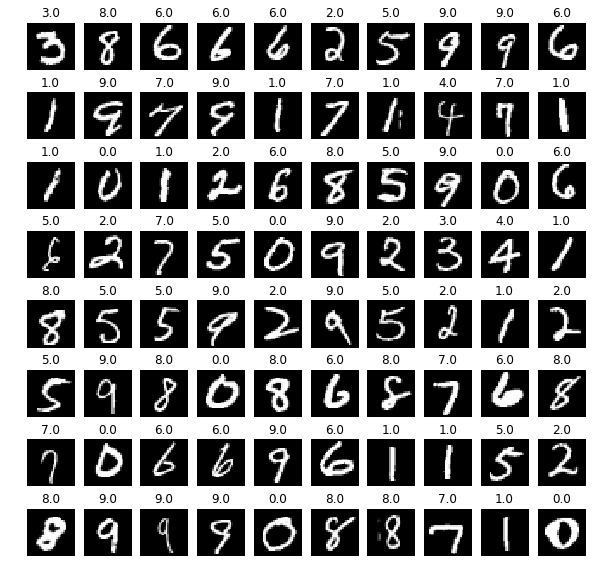

In [163]:
print("SEM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred[i], cmp="gray")
plt.show()

COM REDIMENSIONAMENTO


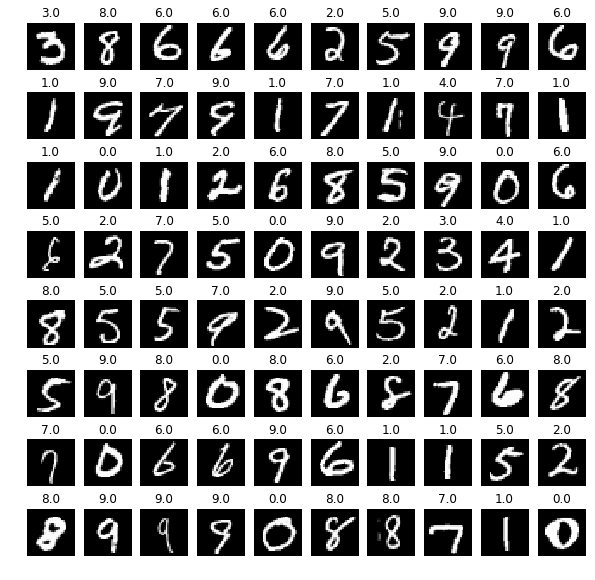

In [164]:
print("COM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred_pca[i], cmp="gray")
plt.show()

# Treinamento utilizando o modelo MLPClassifier com o dobro de neuronios

In [93]:
mlp2 = MLPClassifier(hidden_layer_sizes=(178,), activation='tanh', max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

In [94]:
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_test)
print("Training set score WITHOUT pca: %f" % mlp2.score(X_train, y_train))
print("Test set score WITHOUT pca: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.31019781
Iteration 2, loss = 0.15087277
Iteration 3, loss = 0.10312130
Iteration 4, loss = 0.07795992
Iteration 5, loss = 0.06140391
Iteration 6, loss = 0.04988626
Iteration 7, loss = 0.04071027
Iteration 8, loss = 0.03358559
Iteration 9, loss = 0.02739046
Iteration 10, loss = 0.02280993
Iteration 11, loss = 0.01916781
Iteration 12, loss = 0.01627654
Iteration 13, loss = 0.01333240
Iteration 14, loss = 0.01125300
Iteration 15, loss = 0.00973084
Iteration 16, loss = 0.00848112
Iteration 17, loss = 0.00747311
Iteration 18, loss = 0.00665664
Iteration 19, loss = 0.00595211
Iteration 20, loss = 0.00536854
Iteration 21, loss = 0.00487663
Iteration 22, loss = 0.00441365
Iteration 23, loss = 0.00408929
Iteration 24, loss = 0.00375673
Iteration 25, loss = 0.00353202
Iteration 26, loss = 0.00325412
Iteration 27, loss = 0.00307222
Iteration 28, loss = 0.00288592
Iteration 29, loss = 0.00275860
Iteration 30, loss = 0.00264807
Iteration 31, loss = 0.00249547
Iteration 32, los

In [95]:
mlp2.fit(X_train_pca, y_train)
y_pred_pca2 = mlp2.predict(X_test_pca)
print("Training set score USING pca: %f" % mlp2.score(X_train_pca, y_train))
print("Test set score USING pca: %f" % mlp2.score(X_test_pca, y_test))

Iteration 1, loss = 0.48269647
Iteration 2, loss = 0.28834953
Iteration 3, loss = 0.20726188
Iteration 4, loss = 0.16989872
Iteration 5, loss = 0.14792848
Iteration 6, loss = 0.13254803
Iteration 7, loss = 0.12329142
Iteration 8, loss = 0.11330738
Iteration 9, loss = 0.10715799
Iteration 10, loss = 0.09990887
Iteration 11, loss = 0.09606715
Iteration 12, loss = 0.09097609
Iteration 13, loss = 0.08716378
Iteration 14, loss = 0.08362739
Iteration 15, loss = 0.08036975
Iteration 16, loss = 0.07782310
Iteration 17, loss = 0.07494641
Iteration 18, loss = 0.07279971
Iteration 19, loss = 0.07071204
Iteration 20, loss = 0.06887927
Iteration 21, loss = 0.06609318
Iteration 22, loss = 0.06418931
Iteration 23, loss = 0.06206883
Iteration 24, loss = 0.06121522
Iteration 25, loss = 0.05866867
Iteration 26, loss = 0.05752339
Iteration 27, loss = 0.05615716
Iteration 28, loss = 0.05449059
Iteration 29, loss = 0.05364345
Iteration 30, loss = 0.05212613
Iteration 31, loss = 0.05068403
Iteration 32, los

# Avaliação

In [96]:
print('Classification Report WITHOUT pca')
print(classification_report(y_test, y_pred2, target_names=target_names))

Classification Report WITHOUT pca
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1363
          1       0.99      0.99      0.99      1573
          2       0.98      0.98      0.98      1392
          3       0.98      0.98      0.98      1406
          4       0.97      0.98      0.97      1323
          5       0.98      0.98      0.98      1374
          6       0.98      0.98      0.98      1350
          7       0.98      0.98      0.98      1473
          8       0.98      0.98      0.98      1351
          9       0.97      0.96      0.97      1395

avg / total       0.98      0.98      0.98     14000



In [104]:
print("Acurácia da predição sem PCA: ")
metrics.accuracy_score(y_test,y_pred2)

Acurácia da predição sem PCA: 


0.98071428571428576

In [97]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca2, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1363
          1       0.99      0.98      0.99      1573
          2       0.96      0.96      0.96      1392
          3       0.95      0.95      0.95      1406
          4       0.96      0.96      0.96      1323
          5       0.96      0.94      0.95      1374
          6       0.97      0.97      0.97      1350
          7       0.96      0.96      0.96      1473
          8       0.93      0.94      0.94      1351
          9       0.93      0.93      0.93      1395

avg / total       0.96      0.96      0.96     14000



In [105]:
print("Acurácia da predição com PCA: ")
metrics.accuracy_score(y_test,y_pred_pca2)

Acurácia da predição com PCA: 


0.95835714285714291

# Validação Cruzada

In [98]:
print('Validação cruzada do treinamento SEM a utilização do PCA')
scores = cross_val_score(mlp2,X_train,y_train)
np.mean(scores)

Validação cruzada do treinamento SEM a utilização do PCA
Iteration 1, loss = 0.36206848
Iteration 2, loss = 0.18420741
Iteration 3, loss = 0.13243695
Iteration 4, loss = 0.10203305
Iteration 5, loss = 0.08070125
Iteration 6, loss = 0.06500104
Iteration 7, loss = 0.05447950
Iteration 8, loss = 0.04419880
Iteration 9, loss = 0.03641519
Iteration 10, loss = 0.03047271
Iteration 11, loss = 0.02549227
Iteration 12, loss = 0.02113666
Iteration 13, loss = 0.01791320
Iteration 14, loss = 0.01492684
Iteration 15, loss = 0.01317181
Iteration 16, loss = 0.01143920
Iteration 17, loss = 0.00966527
Iteration 18, loss = 0.00855382
Iteration 19, loss = 0.00772926
Iteration 20, loss = 0.00685736
Iteration 21, loss = 0.00623732
Iteration 22, loss = 0.00560161
Iteration 23, loss = 0.00518419
Iteration 24, loss = 0.00475792
Iteration 25, loss = 0.00439112
Iteration 26, loss = 0.00411351
Iteration 27, loss = 0.00387429
Iteration 28, loss = 0.00367264
Iteration 29, loss = 0.00342823
Iteration 30, loss = 0.0

Iteration 79, loss = 0.00104299
Iteration 80, loss = 0.00103258
Iteration 81, loss = 0.00102209
Iteration 82, loss = 0.00101169
Iteration 83, loss = 0.00100228
Iteration 84, loss = 0.00099172
Iteration 85, loss = 0.00098353
Iteration 86, loss = 0.00097546
Iteration 87, loss = 0.00096417
Iteration 88, loss = 0.00095723
Iteration 89, loss = 0.00094880
Iteration 90, loss = 0.00093833
Iteration 91, loss = 0.00093135
Iteration 92, loss = 0.00092357
Iteration 93, loss = 0.00091708
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


0.97698200804649715

In [100]:
print('Validação cruzada do treinamento COM a utilização do PCA')
scores = cross_val_score(mlp2,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento COM a utilização do PCA
Iteration 1, loss = 0.52724114
Iteration 2, loss = 0.35948180
Iteration 3, loss = 0.26573869
Iteration 4, loss = 0.21315901
Iteration 5, loss = 0.18150999
Iteration 6, loss = 0.16091310
Iteration 7, loss = 0.14637786
Iteration 8, loss = 0.13428493
Iteration 9, loss = 0.12527041
Iteration 10, loss = 0.11649400
Iteration 11, loss = 0.10973585
Iteration 12, loss = 0.10421172
Iteration 13, loss = 0.09869643
Iteration 14, loss = 0.09362583
Iteration 15, loss = 0.09040200
Iteration 16, loss = 0.08566314
Iteration 17, loss = 0.08237571
Iteration 18, loss = 0.07985737
Iteration 19, loss = 0.07609734
Iteration 20, loss = 0.07364334
Iteration 21, loss = 0.07177207
Iteration 22, loss = 0.06808049
Iteration 23, loss = 0.06619115
Iteration 24, loss = 0.06405686
Iteration 25, loss = 0.06173581
Iteration 26, loss = 0.06012052
Iteration 27, loss = 0.05831107
Iteration 28, loss = 0.05700447
Iteration 29, loss = 0.05513953
Iteration 30, loss = 0.0

Iteration 251, loss = 0.00323480
Iteration 252, loss = 0.00321596
Iteration 253, loss = 0.00321284
Iteration 254, loss = 0.00320169
Iteration 255, loss = 0.00319649
Iteration 256, loss = 0.00317275
Iteration 257, loss = 0.00316311
Iteration 258, loss = 0.00316058
Iteration 259, loss = 0.00313239
Iteration 260, loss = 0.00312797
Iteration 261, loss = 0.00312606
Iteration 262, loss = 0.00311169
Iteration 263, loss = 0.00309953
Iteration 264, loss = 0.00309243
Iteration 265, loss = 0.00308660
Iteration 266, loss = 0.00307173
Iteration 267, loss = 0.00305963
Iteration 268, loss = 0.00306112
Iteration 269, loss = 0.00305591
Iteration 270, loss = 0.00304375
Iteration 271, loss = 0.00302692
Iteration 272, loss = 0.00302971
Iteration 273, loss = 0.00301116
Iteration 274, loss = 0.00299126
Iteration 275, loss = 0.00298863
Iteration 276, loss = 0.00298467
Iteration 277, loss = 0.00296662
Iteration 278, loss = 0.00296999
Iteration 279, loss = 0.00295761
Iteration 280, loss = 0.00293791
Iteration 

Iteration 214, loss = 0.00368116
Iteration 215, loss = 0.00367191
Iteration 216, loss = 0.00366441
Iteration 217, loss = 0.00363739
Iteration 218, loss = 0.00362294
Iteration 219, loss = 0.00358253
Iteration 220, loss = 0.00359965
Iteration 221, loss = 0.00357555
Iteration 222, loss = 0.00354287
Iteration 223, loss = 0.00352805
Iteration 224, loss = 0.00351277
Iteration 225, loss = 0.00350360
Iteration 226, loss = 0.00349581
Iteration 227, loss = 0.00348289
Iteration 228, loss = 0.00346128
Iteration 229, loss = 0.00344267
Iteration 230, loss = 0.00344085
Iteration 231, loss = 0.00341523
Iteration 232, loss = 0.00340704
Iteration 233, loss = 0.00339938
Iteration 234, loss = 0.00338014
Iteration 235, loss = 0.00336082
Iteration 236, loss = 0.00335337
Iteration 237, loss = 0.00333305
Iteration 238, loss = 0.00332899
Iteration 239, loss = 0.00331141
Iteration 240, loss = 0.00329433
Iteration 241, loss = 0.00328768
Iteration 242, loss = 0.00327796
Iteration 243, loss = 0.00326717
Iteration 

Iteration 199, loss = 0.00394274
Iteration 200, loss = 0.00389617
Iteration 201, loss = 0.00389734
Iteration 202, loss = 0.00386026
Iteration 203, loss = 0.00386008
Iteration 204, loss = 0.00383087
Iteration 205, loss = 0.00381655
Iteration 206, loss = 0.00379037
Iteration 207, loss = 0.00375564
Iteration 208, loss = 0.00375166
Iteration 209, loss = 0.00374270
Iteration 210, loss = 0.00370799
Iteration 211, loss = 0.00370320
Iteration 212, loss = 0.00367424
Iteration 213, loss = 0.00367541
Iteration 214, loss = 0.00364084
Iteration 215, loss = 0.00363784
Iteration 216, loss = 0.00360149
Iteration 217, loss = 0.00358407
Iteration 218, loss = 0.00357482
Iteration 219, loss = 0.00356368
Iteration 220, loss = 0.00352679
Iteration 221, loss = 0.00353125
Iteration 222, loss = 0.00350999
Iteration 223, loss = 0.00350342
Iteration 224, loss = 0.00348670
Iteration 225, loss = 0.00348307
Iteration 226, loss = 0.00345872
Iteration 227, loss = 0.00343746
Iteration 228, loss = 0.00342904
Iteration 

0.95828567563336586

# Comparação entre as predições utilizando ou não o PCA

SEM REDIMENSIONAMENTO


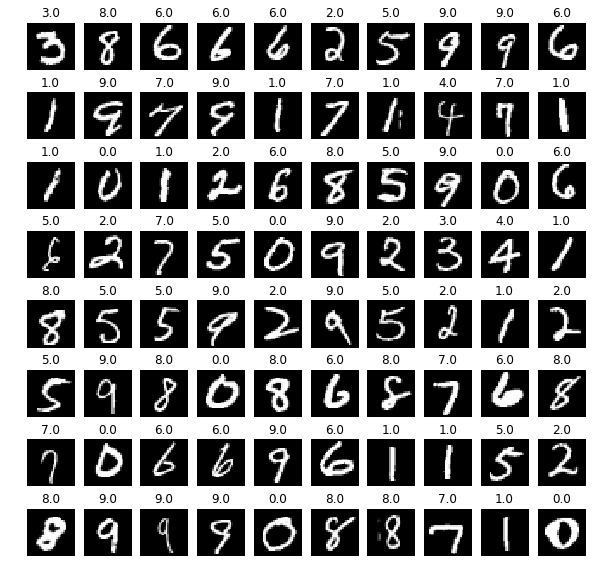

In [165]:
print("SEM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred2[i], cmp="gray")
plt.show()

COM REDIMENSIONAMENTO


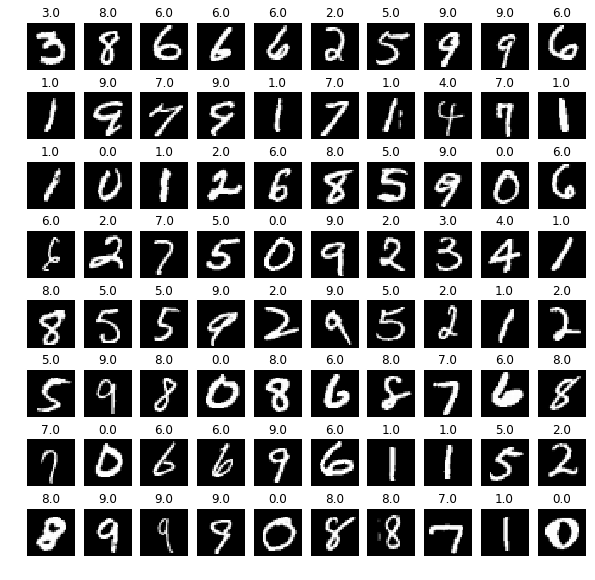

In [166]:
print("COM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred_pca2[i], cmp="gray")
plt.show()